In [1]:
print("Hello world")

Hello world


In [2]:
!pip install streamlit

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import streamlit as st
from streamlit.proto.RootContainer_pb2 import RootContainer

def _st_initialize():

    def _get_logger():
        from streamlit.logger import get_logger

        return get_logger()

    st.report_thread = True
    st._is_running_with_streamlit = True
    st._logger = _get_logger()

st._initialize = _st_initialize


In [5]:
df = pd.read_csv(r"C:\Users\andre\OneDrive\Documentos\Projetos_Python\Plotly2024\csgo_dados.csv")

In [6]:
df.head()

,Unnamed: 0,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
0,0,ZywOo,France,['Vitality'],854.0,22399.0,5248.0,1.38,1.28
1,1,s1mple,Ukraine,['Natus Vincere'],1429.0,37717.0,8070.0,1.33,1.25
2,2,deko,Russia,['1WIN'],190.0,5096.0,1250.0,1.42,1.24
3,3,saffee,Brazil,['paiN'],202.0,5383.0,1211.0,1.37,1.24
4,4,sh1ro,Russia,['Gambit'],744.0,19780.0,4593.0,1.43,1.22


In [7]:
df.tail()

,Unnamed: 0,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
805,805,adreN,United States,['Liquid'],697.0,18241.0,380.0,1.03,1.0
806,806,AaroN,United Kingdom,['Infused'],142.0,3698.0,-8.0,1.00,1.0
807,807,MODDII,Sweden,['Heroic'],1169.0,30527.0,408.0,1.02,1.0
808,808,void,Australia,['Ground Zero'],437.0,11368.0,127.0,1.02,1.0
809,809,pyth,Sweden,['NIP'],756.0,19801.0,-5.0,1.00,1.0


In [8]:
df.describe()

,total_maps,total_rounds,kd_diff,kd,rating
count,801.000000,801.000000,801.000000,801.000000,801.000000
mean,559.038702,14648.305868,876.593009,1.084944,1.052884
std,433.474506,11407.760695,1072.250782,0.067772,0.045023
min,100.000000,2487.000000,-98.000000,0.980000,1.000000
25%,204.000000,5361.000000,169.000000,1.040000,1.020000
50%,412.000000,10936.000000,458.000000,1.070000,1.040000
75%,820.000000,21258.000000,1171.000000,1.120000,1.080000
max,2025.000000,53382.000000,8070.000000,1.430000,1.280000


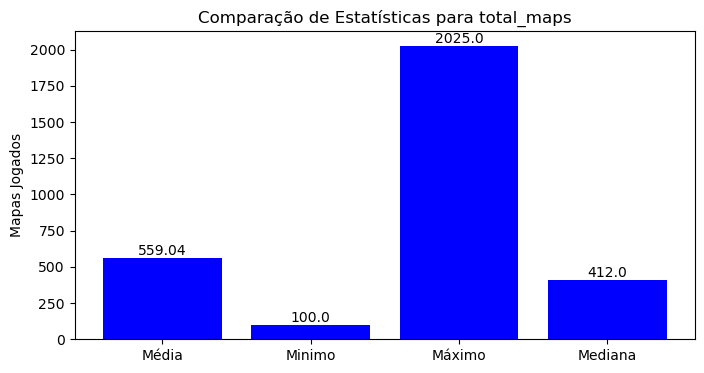

In [9]:
mean_value = df['total_maps'].mean()
min_value = df['total_maps'].min()
max_value = df['total_maps'].max()
median_value = df['total_maps'].median()

labels = ['Média', 'Minimo', 'Máximo', 'Mediana']
values = [mean_value, min_value, max_value, median_value]

plt.figure(figsize=(8, 4))
bars = plt.bar(labels, values, color=['blue'])
plt.title('Comparação de Estatísticas para total_maps')
plt.ylabel('Mapas Jogados')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 2), ha='center', va='bottom')

plt.show()

A maior parte dos jogadores nesse dataset não possui um grande número de mapas jogados, especialmente comparados com o jogador com o maior número de mapas.

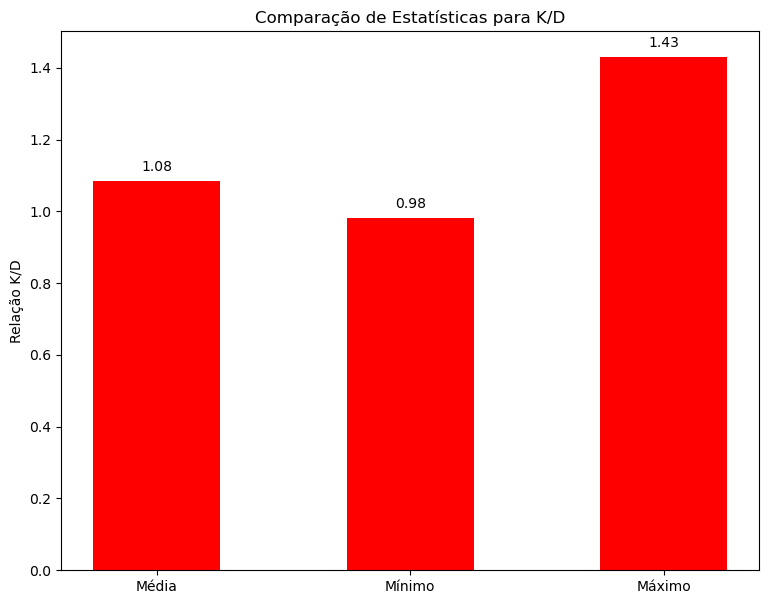

0.5


In [10]:
mean_value = df['kd'].mean()
min_value = df['kd'].min()
max_value = df['kd'].max()

labels = ['Média', 'Mínimo', 'Máximo']
values = [mean_value, min_value, max_value]

plt.figure(figsize=(9,7))
bars_kd = plt.bar(labels,values,color=['Red'], width = 0.5)
plt.title('Comparação de Estatísticas para K/D')
plt.ylabel('Relação K/D')

for bar in bars_kd:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 2), ha='center', va='bottom')
    
plt.show()
print(bar.get_width())

In [11]:
df.head(100)

,Unnamed: 0,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
0,0,ZywOo,France,['Vitality'],854.0,22399.0,5248.0,1.38,1.28
1,1,s1mple,Ukraine,['Natus Vincere'],1429.0,37717.0,8070.0,1.33,1.25
2,2,deko,Russia,['1WIN'],190.0,5096.0,1250.0,1.42,1.24
3,3,saffee,Brazil,['paiN'],202.0,5383.0,1211.0,1.37,1.24
4,4,sh1ro,Russia,['Gambit'],744.0,19780.0,4593.0,1.43,1.22
...,...,...,...,...,...,...,...,...,...
95,95,FREDDyFROG,Sweden,['Apeks'],1171.0,31220.0,3578.0,1.18,1.11
96,96,ottoNd,Finland,['HAVU'],820.0,21635.0,2505.0,1.19,1.11
97,97,gxx-,Albania,['BLINK'],145.0,3818.0,467.0,1.20,1.11
98,98,zorte,Russia,['forZe'],518.0,13789.0,1650.0,1.19,1.11


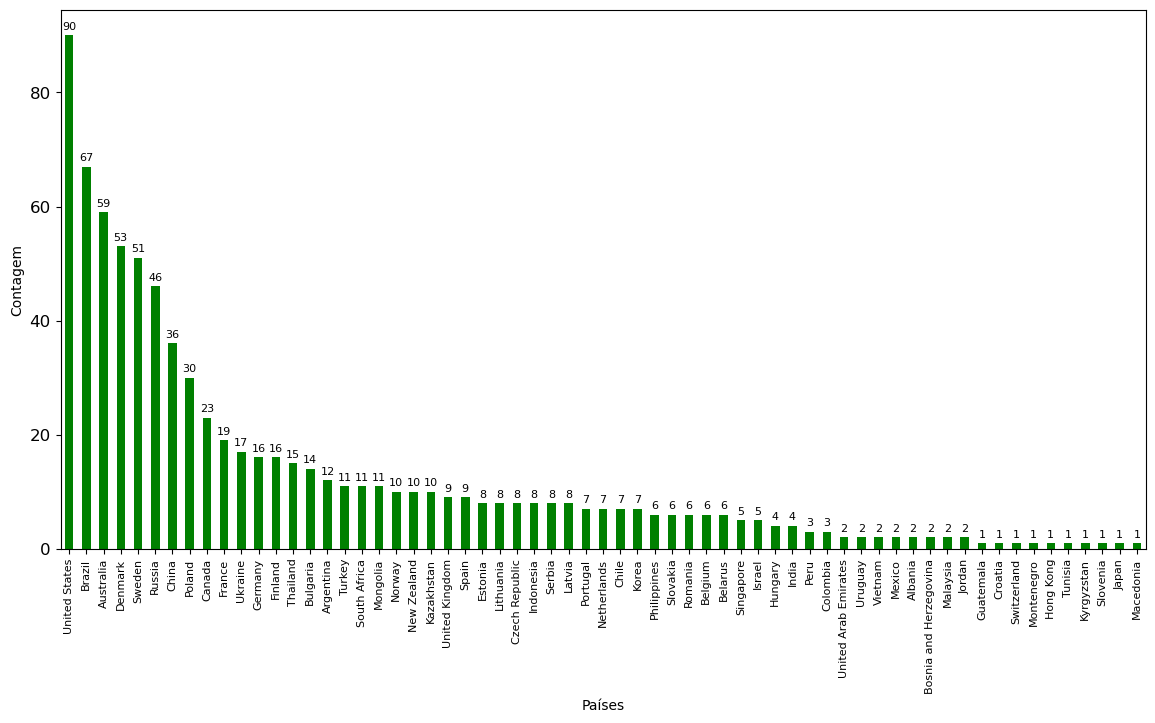

In [12]:
df2 = df
ax = df2['country'].value_counts().plot(kind='bar', color='green', figsize=(14,7))
plt.ylabel("Contagem")
plt.xlabel("Países")

plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=12)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()+1),
                ha='center', va='baseline', fontsize=8, color='black')
    
    
plt.show()

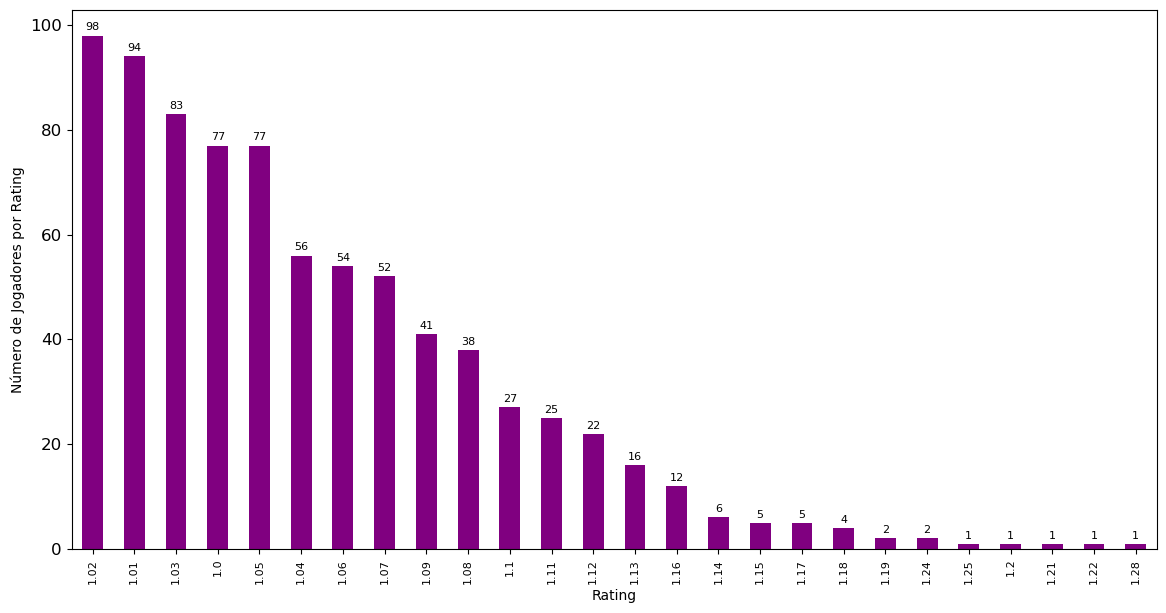

In [13]:
df3 = df

df3_sorted = df3.sort_values(by='rating')

ax2 = df3['rating'].value_counts().plot(kind='bar', color='purple', figsize=(14,7))

plt.ylabel("Número de Jogadores por Rating")
plt.xlabel("Rating")

plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=12)

for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()+1),
                ha='center', va='baseline', fontsize=8, color='black')
    
    
plt.show()

O gráfico acima analisa o número de jogadores de cada rating em ordem de maior para menor, o que não nos permite chegar a grandes conclusões, diferente do gráfico abaixo.

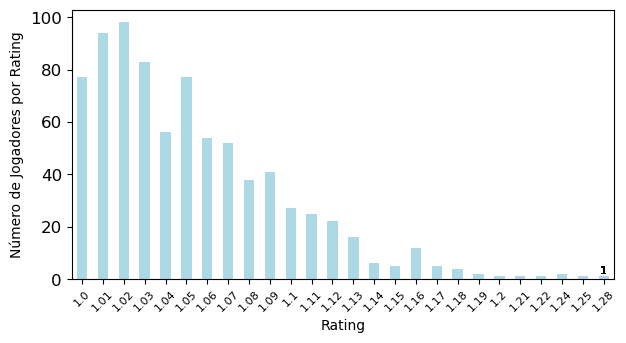

In [16]:
df4 = df

rating_counts = df4['rating'].value_counts().sort_index()

ax2 = rating_counts.plot(kind='bar', color='lightblue', figsize=(7, 3.5))

plt.ylabel("Número de Jogadores por Rating")
plt.xlabel("Rating")

plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=12)

for i, row in df4.iterrows():
    plt.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()+1),
                ha='center', va='baseline', fontsize=8, color='black')
    
    
plt.show()

Esse gráfico, por outro lado, nos mostra que a maioria dos jogadores dessa análise está na faixa de 1.01 até 1.09, com uma queda a partir de 1.10.

In [ ]:
df5 = df

plt.figure(figsize=(8,8))  

plt.scatter(df['kd'], df['rating'], color='black', alpha=0.5, s=10)  

plt.title('KD vs Rating')
plt.xlabel('K/D')
plt.ylabel('Rating')

plt.show()

O gráfico acima mostra que uum bom Rating e um bom KD se relacionam, ou seja, DE MODO GERAL, jogadores mais eficientes em K/D tendem a ajudar mais o seu time.

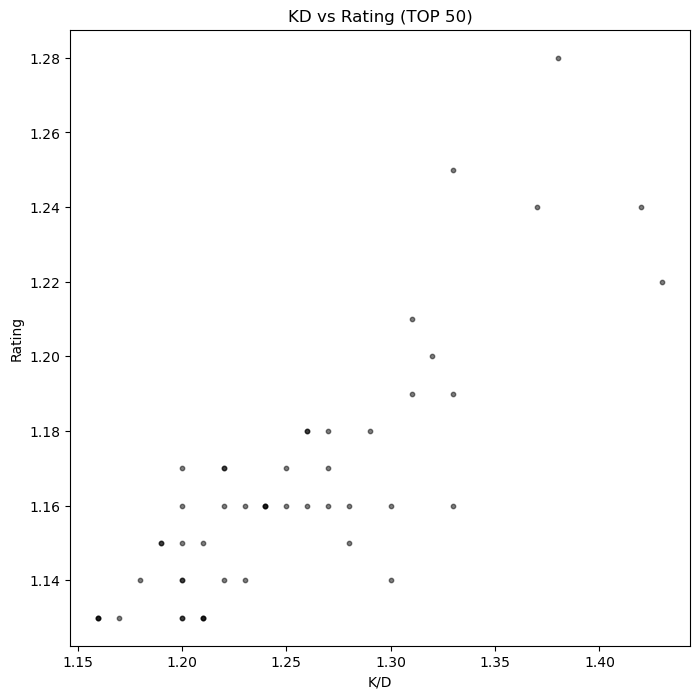

In [24]:
df6 = df.head(50)

plt.figure(figsize=(8,8))  

plt.scatter(df6['kd'], df6['rating'], color='black', alpha=0.5, s=10)  

plt.title('KD vs Rating (TOP 50)')
plt.xlabel('K/D')
plt.ylabel('Rating')

plt.show() 

In [ ]:
df6 = df.head(20)

plt.figure(figsize=(10,10))  

plt.scatter(df6['kd'], df6['rating'], color='darkblue', alpha=1, s=10)  

plt.title('KD vs Rating (TOP 20)')
plt.xlabel('K/D')
plt.ylabel('Rating')

for i, row in df6.iterrows():
    plt.annotate(row['name'], (row['kd'], row['rating']), fontsize=7, rotation = 45, alpha=1, xytext=(0, 3),
                 textcoords='offset points', ha='left')

    
plt.show() 

Analisando essa relação para os TOP20 jogadores, percebemos alguns outliers, que serão falados abaixo.
OBS: alguns jogadores com KD e Rating iguais tiveram seus nomes sobrepostos, não consegui fazer com que os nomes deles não se sobrepusessem, qualquer ajuda é agradecida!

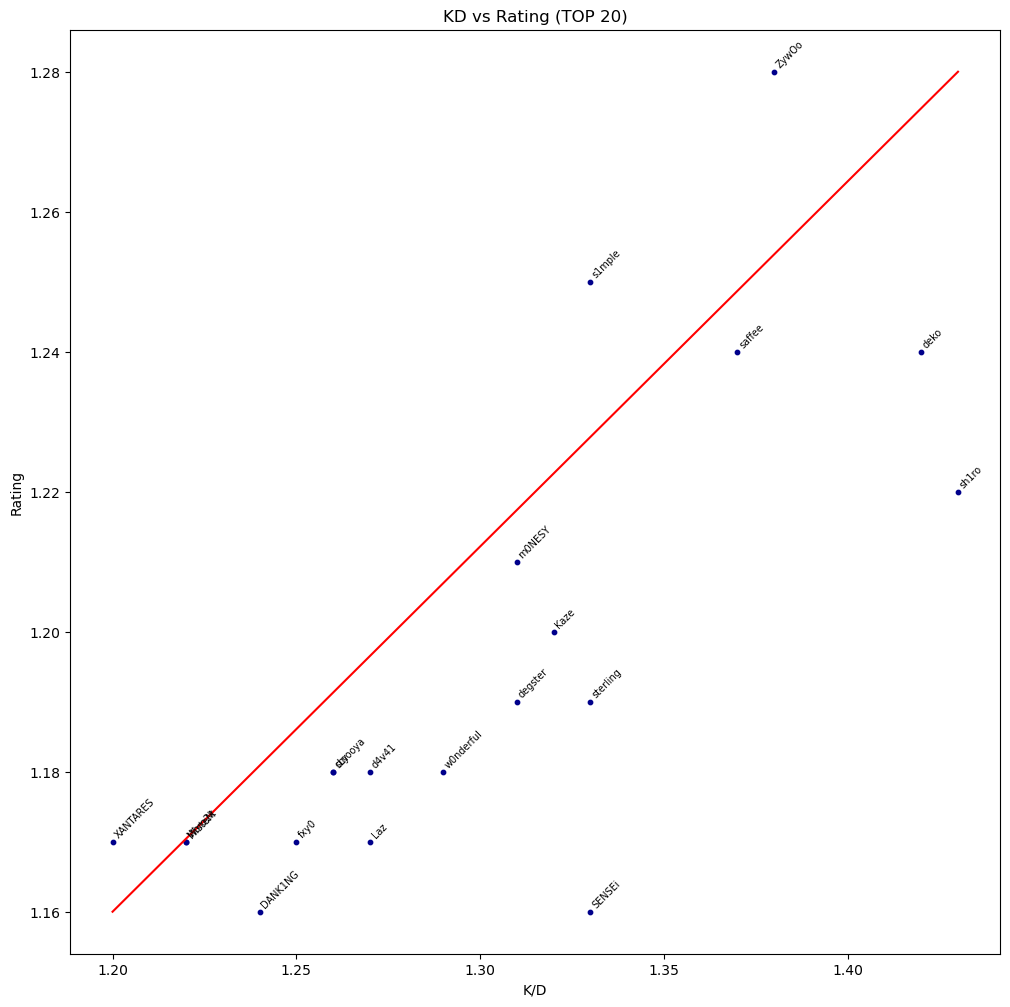

In [15]:
df6 = df.head(20)

plt.figure(figsize=(12,12))  

plt.scatter(df6['kd'], df6['rating'], color='darkblue', alpha=1, s=10)  

plt.title('KD vs Rating (TOP 20)')
plt.xlabel('K/D')
plt.ylabel('Rating')

for i, row in df6.iterrows():
    plt.annotate(row['name'], (row['kd'], row['rating']), fontsize=7,rotation = 45, alpha=1, xytext=(0, 3),
                 textcoords='offset points', ha='left')

plt.plot([df6['kd'].min(), df6['kd'].max()],
         [df6['rating'].min(), df6['rating'].max()],
         color='red', linestyle='-', label='Linha Diagonal')
    
plt.show() 

Analisando com uma linha de "corte" percebemos que os principais outliers são: S1mple, ZywOo, deko e sh1ro. 

Os dois primeiros, conhecidos por serem os melhores jogadores do mundo, possuem um Rating proporcionalmente maior se comparado ao seu KD, indicando que são jogadores com uma atuação mais agressiva e mais decisiva ("clutch"), já que o aspecto que faz seu Rating se manter maior são situações de impacto do jogo, onde eles precisam atacar/defender Bombsites sozinhos e, consequentemente, se pôe mais em situações de risco. 

Já os dois últimos, segundo seus números, são jogadores mais passivos e tendem a jogar em função de seu time. Raramente encontram-se em situações solitárias, e preferem "guardar" a realizar tentativas arriscadas em jogadas dificeis.  


In [27]:
df7 = df

df_filtered = df7[df7['total_maps'] > 750]
df_filtered.head(50)

,Unnamed: 0,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
0,0,ZywOo,France,['Vitality'],854.0,22399.0,5248.0,1.38,1.28
1,1,s1mple,Ukraine,['Natus Vincere'],1429.0,37717.0,8070.0,1.33,1.25
6,6,Kaze,Malaysia,['ViCi'],784.0,20459.0,3900.0,1.32,1.20
15,15,XANTARES,Turkey,['Space Soldiers'],1511.0,39753.0,5320.0,1.20,1.17
21,21,coldzera,Brazil,['SK'],1336.0,34861.0,5661.0,1.26,1.16
22,22,device,Denmark,['Astralis'],1733.0,45159.0,7005.0,1.25,1.16
25,25,Sico,New Zealand,['Renegades'],824.0,20947.0,3686.0,1.30,1.16
27,27,BnTeT,Indonesia,['TYLOO'],969.0,25236.0,3742.0,1.24,1.16
31,31,NiKo,Bosnia and Herzegovina,['G2'],1493.0,39556.0,4942.0,1.19,1.15
33,33,KSCERATO,Brazil,['FURIA'],806.0,20993.0,3430.0,1.28,1.15


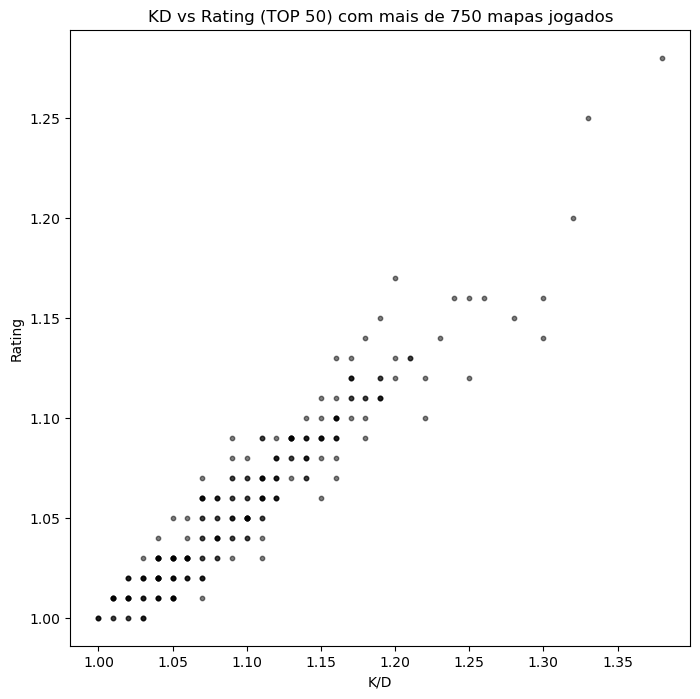

In [29]:
plt.figure(figsize=(8,8))  

plt.scatter(df_filtered['kd'], df_filtered['rating'], color='black', alpha=0.5, s=10)  

plt.title('KD vs Rating (TOP 50) com mais de 750 mapas jogados')
plt.xlabel('K/D')
plt.ylabel('Rating')

plt.show() 

In [30]:
df_filtered.head(20)

,Unnamed: 0,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
0,0,ZywOo,France,['Vitality'],854.0,22399.0,5248.0,1.38,1.28
1,1,s1mple,Ukraine,['Natus Vincere'],1429.0,37717.0,8070.0,1.33,1.25
6,6,Kaze,Malaysia,['ViCi'],784.0,20459.0,3900.0,1.32,1.20
15,15,XANTARES,Turkey,['Space Soldiers'],1511.0,39753.0,5320.0,1.20,1.17
21,21,coldzera,Brazil,['SK'],1336.0,34861.0,5661.0,1.26,1.16
22,22,device,Denmark,['Astralis'],1733.0,45159.0,7005.0,1.25,1.16
25,25,Sico,New Zealand,['Renegades'],824.0,20947.0,3686.0,1.30,1.16
27,27,BnTeT,Indonesia,['TYLOO'],969.0,25236.0,3742.0,1.24,1.16
31,31,NiKo,Bosnia and Herzegovina,['G2'],1493.0,39556.0,4942.0,1.19,1.15
33,33,KSCERATO,Brazil,['FURIA'],806.0,20993.0,3430.0,1.28,1.15


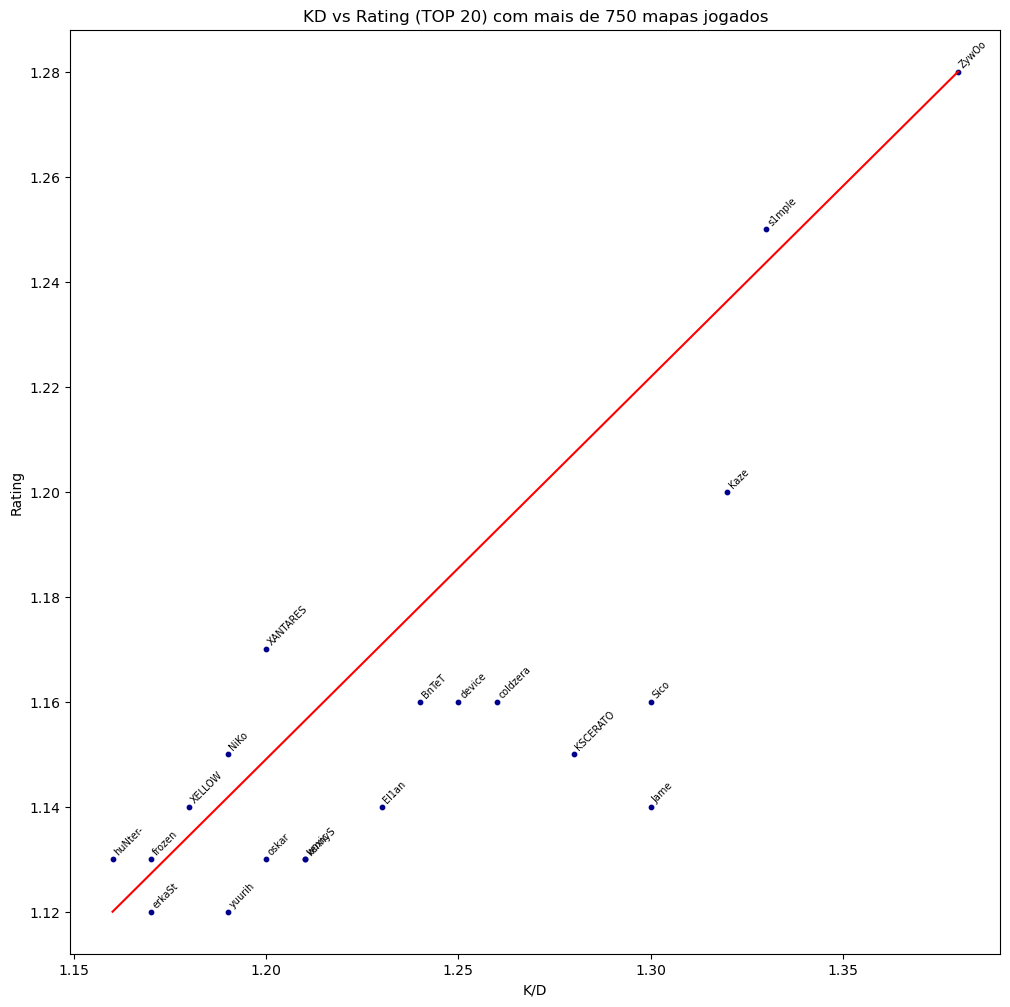

In [32]:
df8 = df_filtered.head(20)
plt.figure(figsize=(12,12))  

plt.scatter(df8['kd'], df8['rating'], color='darkblue', alpha=1, s=10)  

plt.title('KD vs Rating (TOP 20) com mais de 750 mapas jogados')
plt.xlabel('K/D')
plt.ylabel('Rating')

for i, row in df8.iterrows():
    plt.annotate(row['name'], (row['kd'], row['rating']), fontsize=7,rotation = 45, alpha=1, xytext=(0, 3),
                 textcoords='offset points', ha='left')

plt.plot([df8['kd'].min(), df8['kd'].max()],
         [df8['rating'].min(), df8['rating'].max()],
         color='red', linestyle='-', label='Linha Diagonal')
    
plt.show() 

Fazendo a mesma análise para jogadores do TOP 20 com mais de 750 mapas jogados, pudemos perceber algumas coisas:
- Analisando mais mapas, aparecem mais jogadores famosos em relação a antes, como coldzera, device, NiKo, kennyS e assim por diante;
- Essa analise permite visualizar jogadores mais experientes que, mesmo com vários mapas jogados, conseguiram manter sua qualidade; 

Alguns jogadores interessantes são:
- XANTARES, S1mple, ZywOo, NiKo, hunter, frozen, YELLOW: jogadores com perfis mais agressivos, conhecidos por ter uma qualidade de mira bem superior a outros jogadores;
- Jame, Sico, yuurih, device, coldzera: jogadores que jogam "em função" de um IGL e são responsáveis por coordenar rounds a vitoria junto ao time - são muito eficientes e menos agressivos quando solitários (preferem "guardar");
- KSCERATO, kennyS: jogadores que, mesmo com perfil agressivo, mantém-se com K/D maior proporcional ao seu Rating;